In [202]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import plotly.graph_objects as go
from tqdm import tqdm
import yfinance as yf
import pandas as pd
import numpy as np
import os
import pandas_ta as ta
import sys
import seaborn as sns

from backtesting import Strategy, Backtest

In [203]:
if os.path.exists("data.csv"):
    df = pd.read_csv("data.csv", index_col=0)
else:
    df = yf.download("GC=F", period="max")
    # df = gold_ticker.history(period="max", interval='5m')
    df.to_csv("data.csv")

df.index = pd.to_datetime(df.index, utc=True)

df.drop(columns=['Volume', 'Adj Close'], inplace=True)

# display(df.shape)
# display(df.head(3))

In [ ]:
class DCA(Strategy):
    size = 5
    pnl = 500

    def init(self):
        self.day_of_week = self.I(
            lambda x: x,
            self.data.Close.s.index.dayofweek
        )

    def next(self):
        if not self.position:
            self.buy()
        if self.position.pl > self.pnl:
            self.position.close()
        if self.position.pl < -self.pnl:
            self.buy(size=self.size)

        # if (len(self.data.Close) > self.period) and (self.data.Close[-1]/self.data.Close[-self.period] < self.fraction):
        #     self.buy(size=self.size)
        # if self.position.pl > 1000:
        #     self.position.close()
        # if self.position.pl < -1000:
        #     self.buy(size=self.size)

bt = Backtest(df, DCA, cash=10_000)

stats, heatmap = bt.optimize(
    pnl=[i * 100 for i in range(1, 10)],
    size=[i for i in range(1, 11)],
    maximize='Return [%]',
    max_tries=300,
    random_state=0,
    return_heatmap=True
)

result = bt.run();
bt.plot();

result

Backtest.optimize:   0%|          | 0/18 [00:00<?, ?it/s]

/home/mod7ex/.local/lib/python3.10/site-packages/backtesting/_plotting.py:462: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Start                     2000-08-30 00:00...
End                       2024-11-01 00:00...
Duration                   8829 days 00:00:00
Exposure Time [%]                   99.967029
Equity Final [$]                 80075.925598
Equity Peak [$]                  81085.023254
Return [%]                         700.759256
Buy & Hold Return [%]              902.519154
Return (Ann.) [%]                    9.027036
Volatility (Ann.) [%]               18.538274
Sharpe Ratio                          0.48694
Sortino Ratio                        0.761769
Calmar Ratio                          0.20759
Max. Drawdown [%]                  -43.484912
Avg. Drawdown [%]                   -2.787172
Max. Drawdown Duration     3243 days 00:00:00
Avg. Drawdown Duration       58 days 00:00:00
# Trades                                   92
Win Rate [%]                        98.913043
Best Trade [%]                       6.416188
Worst Trade [%]                     -1.198246
Avg. Trade [%]                    

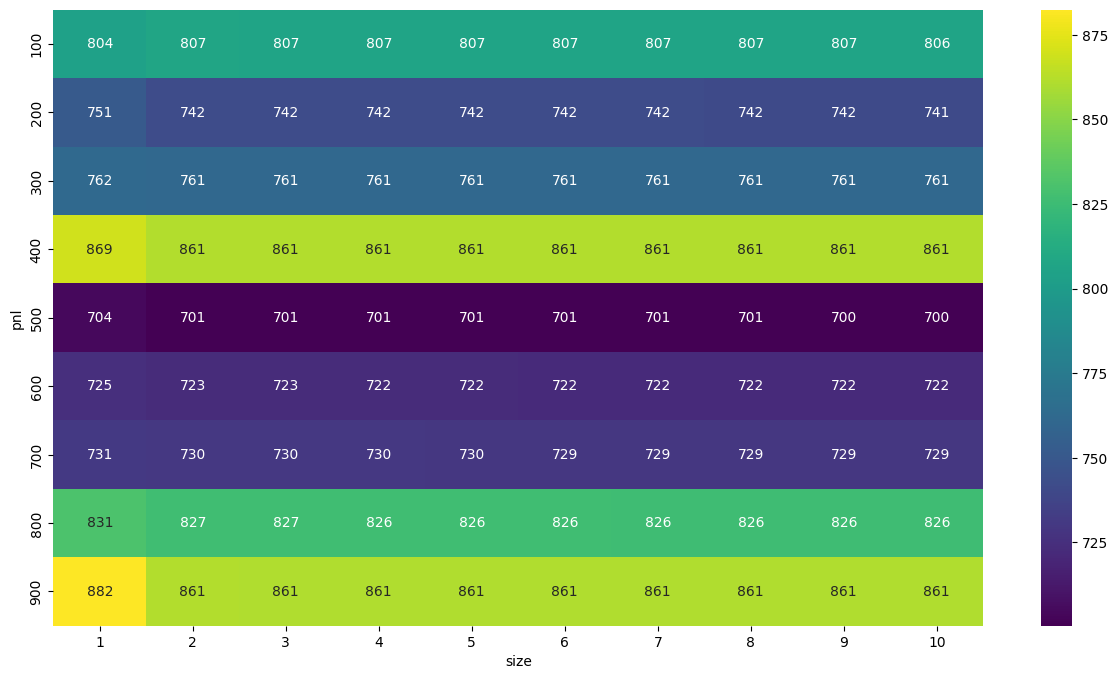

In [207]:
heatmap_df = heatmap.unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [206]:
stats['_strategy']

<Strategy DCA(pnl=900,size=1)>